In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
import warnings; warnings.simplefilter('ignore')

# Шлях до файлу
countries_file = 'C:/IDA_Ostrovshchuk/Country-data-copy.csv'

# Назви стовпців для файлу
countries_columns = ['Name', 'Children mortality', 'Exports', 'Health', 'Imports', 'Income', 'Inflation', 'Life expectancy', 'Total Fertility', 'GDP']

# Завантаження файлів у змінні DataFrame
countries = pd.read_csv(countries_file, sep=',', header=None, names=countries_columns, engine='python')

In [2]:
# Вивести перші 5 рядків датафрейму
print(countries.head())

# Загальна інформація про дані
print(countries.info())

# Видалення рядків з пропущеними значеннями
countries = countries.dropna()



                  Name  Children mortality  Exports  Health  Imports  Income  \
0          Afghanistan                90.2     10.0    7.58     44.9    1610   
1              Albania                16.6     28.0    6.55     48.6    9930   
2              Algeria                27.3     38.4    4.17     31.4   12900   
3               Angola               119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda                10.3     45.5    6.03     58.9   19100   

   Inflation  Life expectancy  Total Fertility    GDP  
0       9.44             56.2             5.82    553  
1       4.49             76.3             1.65   4090  
2      16.10             76.5             2.89   4460  
3      22.40             60.1             6.16   3530  
4       1.44             76.8             2.13  12200  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              ----

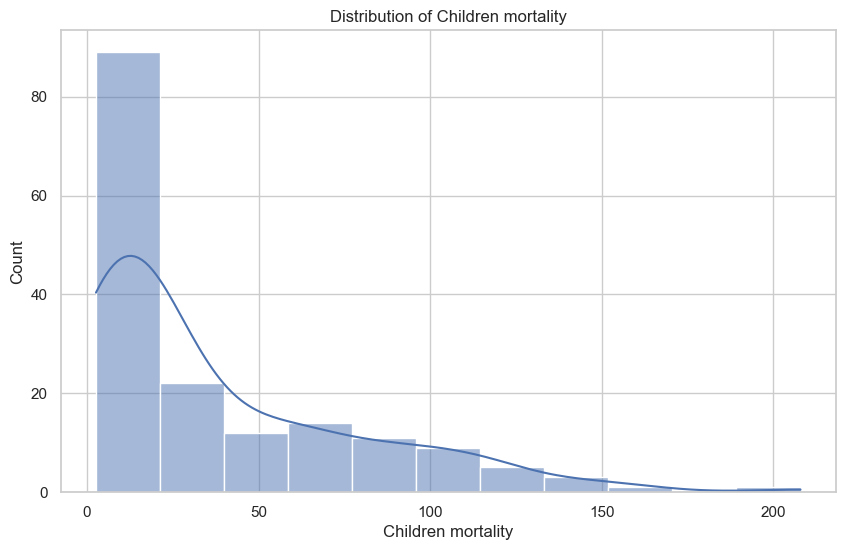

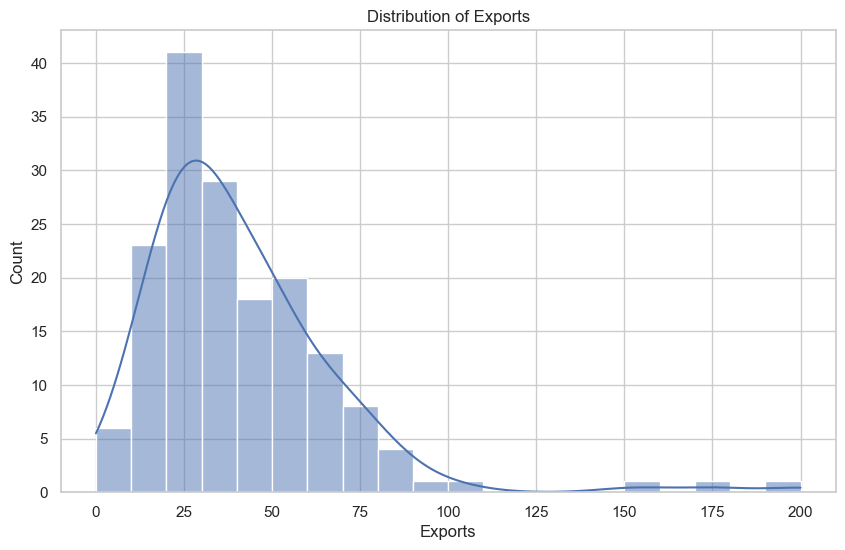

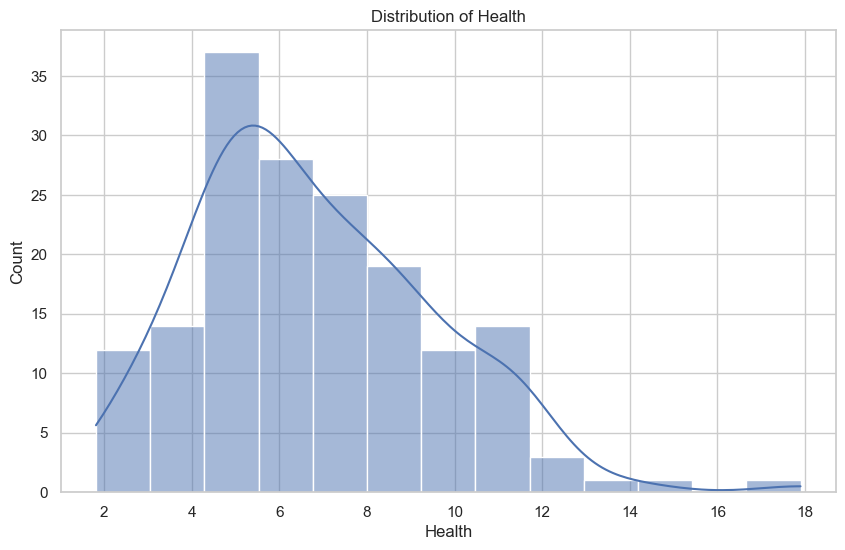

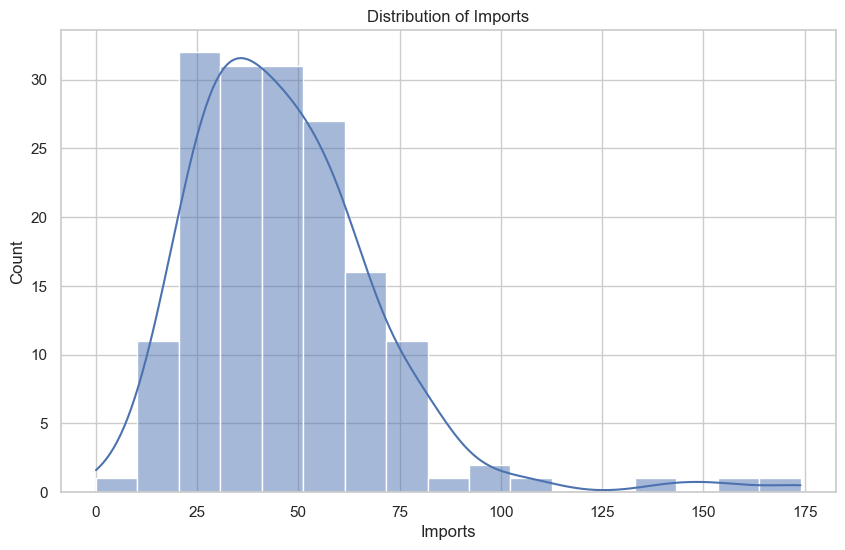

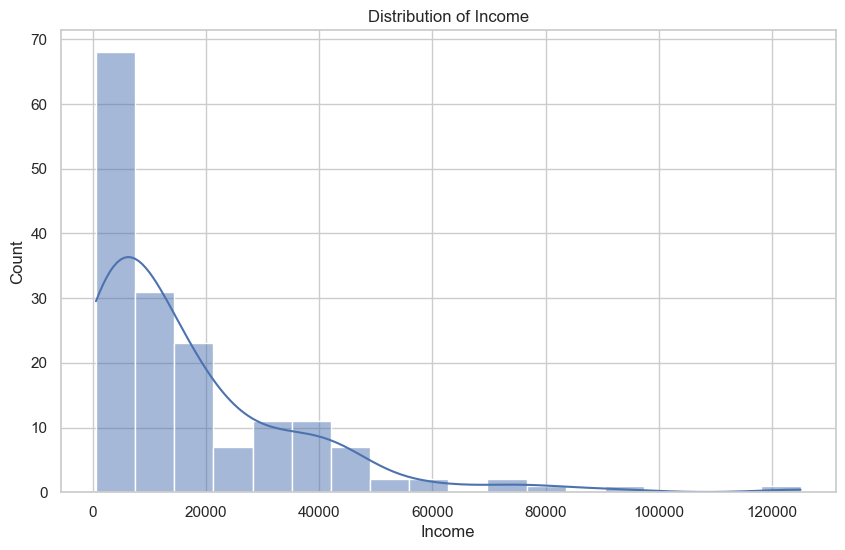

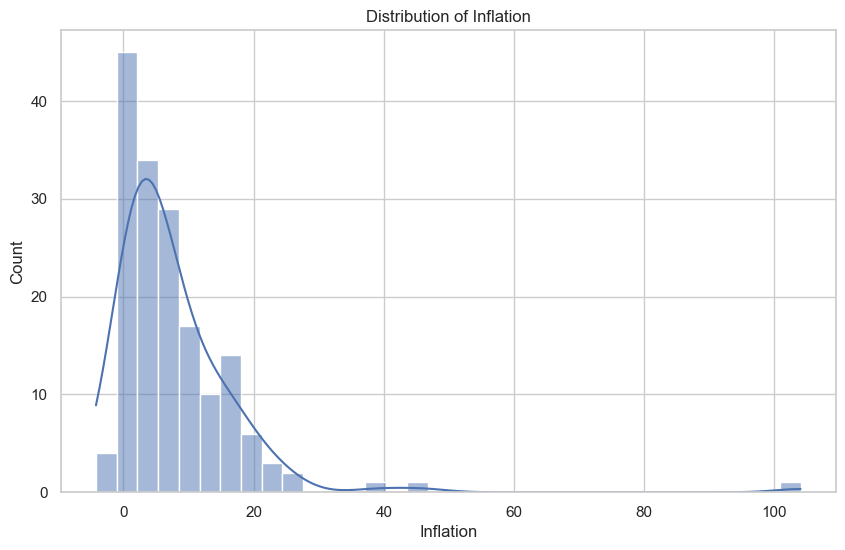

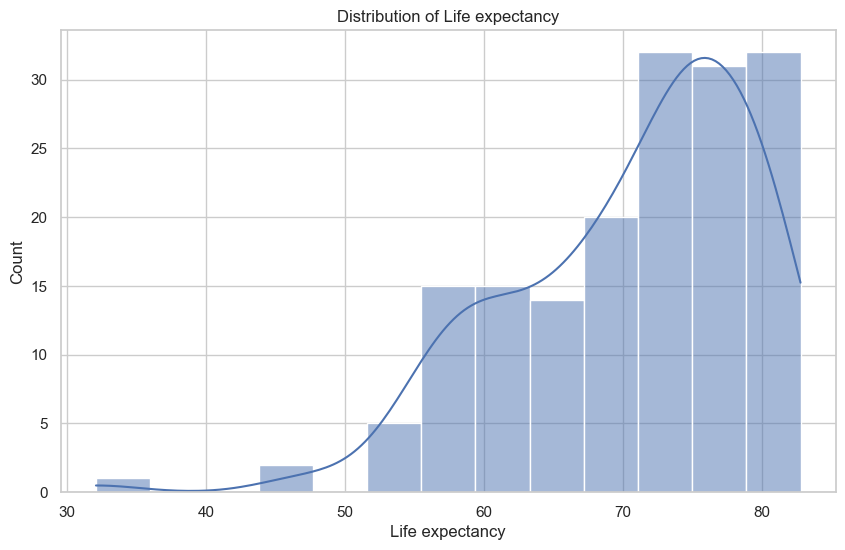

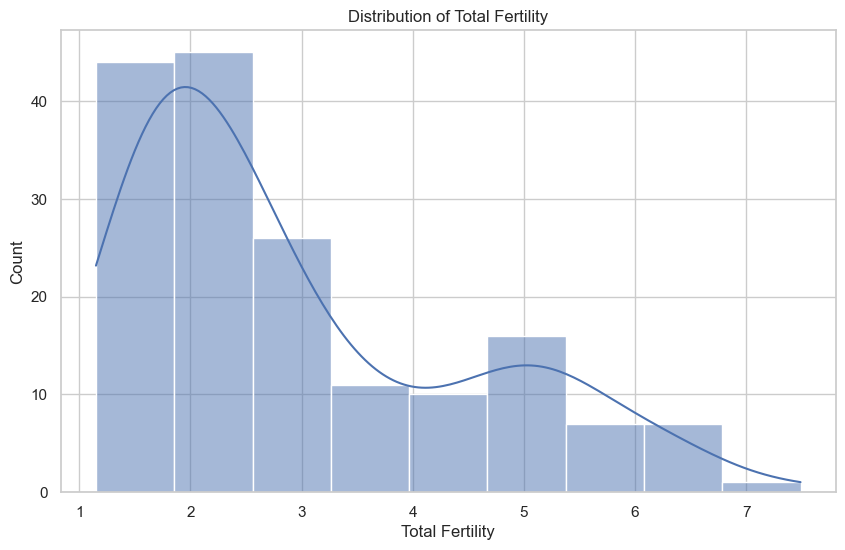

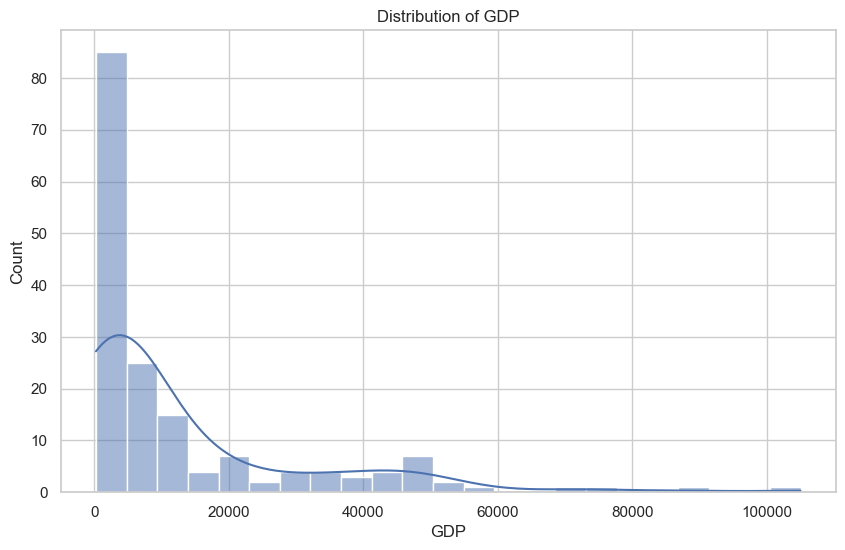

In [3]:
# Однофакторний аналіз
# Встановлюємо стиль графіків
sns.set(style="whitegrid")

# Розподіл для кожного фактора
for column in countries_columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(countries[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


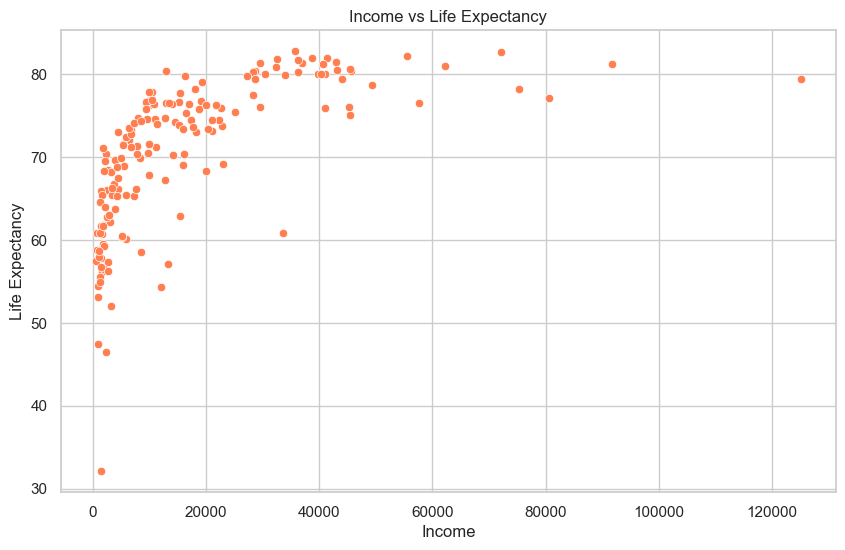

In [4]:
# Двофакторний аналіз: scatter plot "Income" vs "Life expectancy"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Life expectancy', data=countries, color='coral')
plt.title('Income vs Life Expectancy')
plt.xlabel('Income')
plt.ylabel('Life Expectancy')
plt.show()

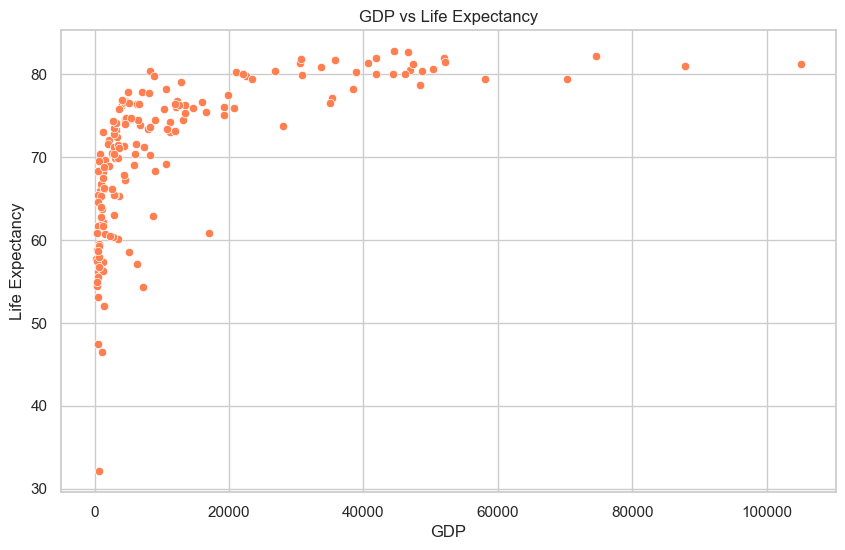

In [5]:
# Двофакторний аналіз: scatter plot "GDP" vs "Life expectancy"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life expectancy', data=countries, color='coral')
plt.title('GDP vs Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

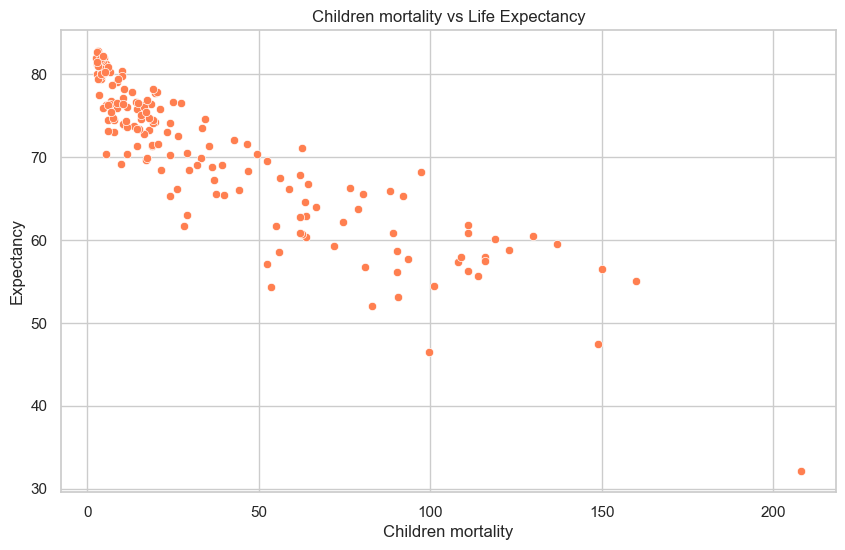

In [6]:
# Двофакторний аналіз: scatter plot "Children mortality" vs "Life expectancy"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Children mortality', y='Life expectancy', data=countries, color='coral')
plt.title('Children mortality vs Life Expectancy')
plt.xlabel('Children mortality')
plt.ylabel('Expectancy')
plt.show()

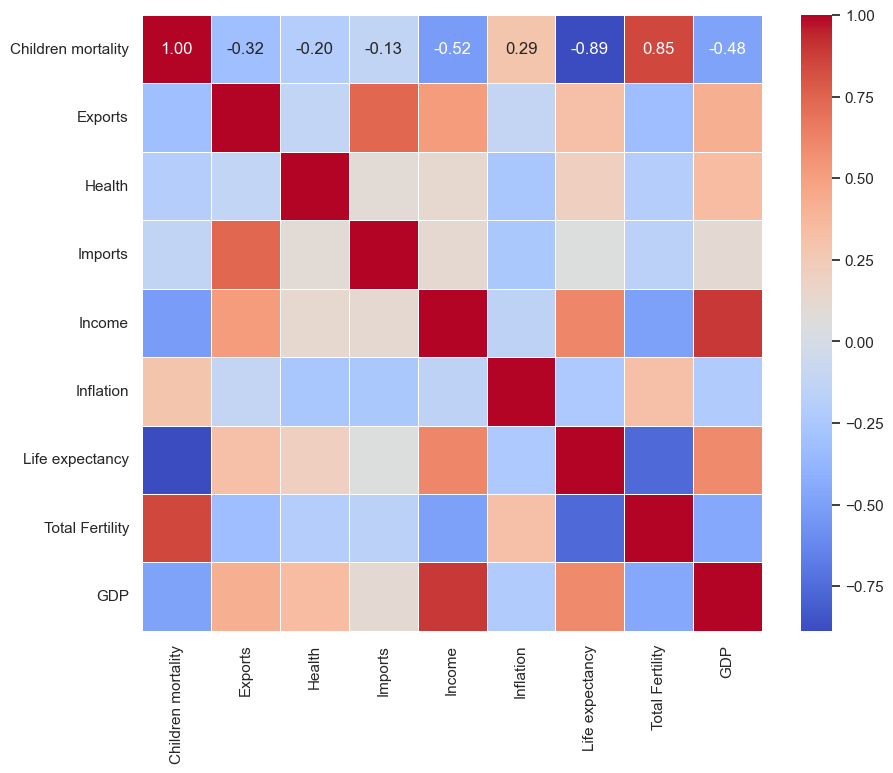

In [7]:
#Кореляційний аналіз
# Встановлення розмірів графіку
plt.figure(figsize=(10, 8))

# Створення теплокарти кореляційної матриці за допомогою seaborn
correlation_matrix = countries[countries_columns[1:]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Відображення графіку
plt.show()

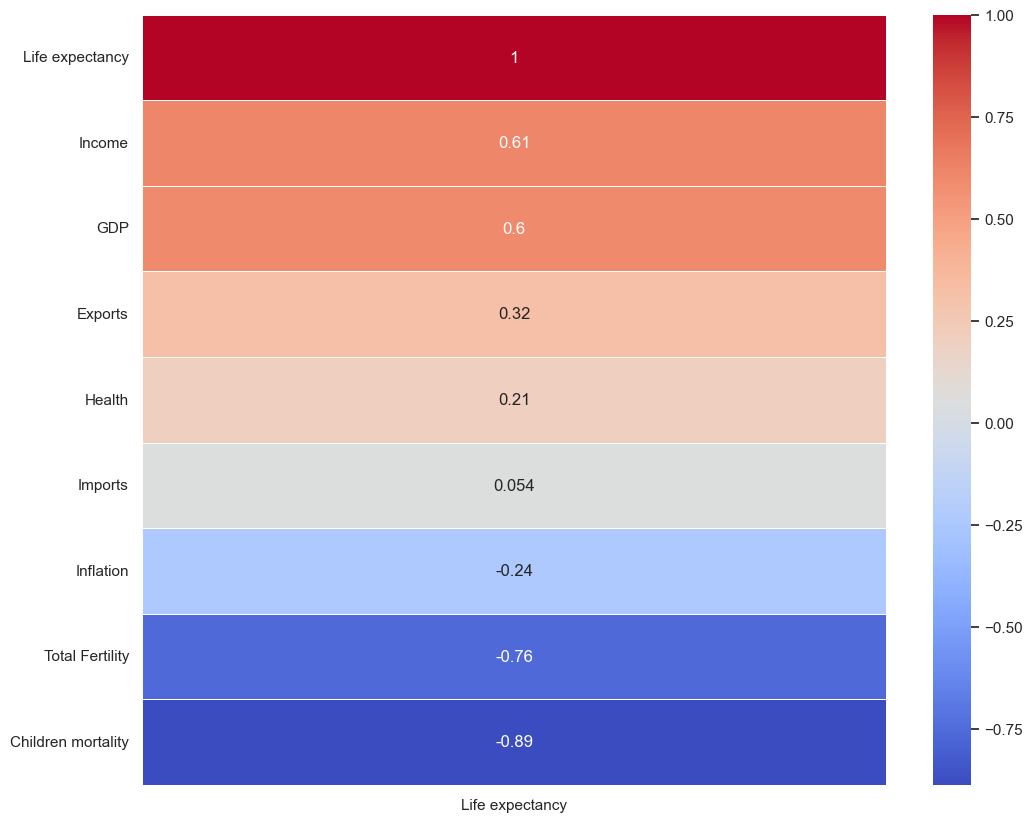

In [8]:
#Вплив факторів на тривалість життя
correlation_matrix = countries[countries_columns[1:]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix[['Life expectancy']].sort_values(by='Life expectancy', ascending=False), annot=True, cmap='coolwarm', linewidths=.5)
plt.show()

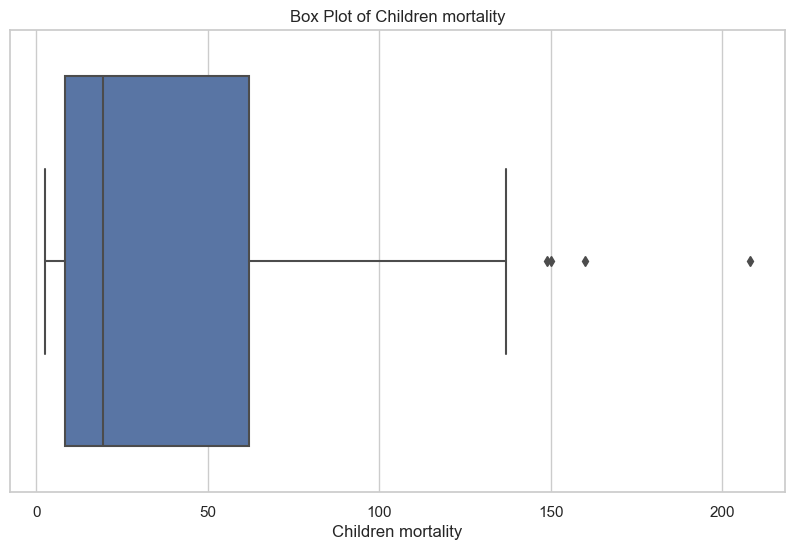

Outliers in Children mortality:
                          Name  Children mortality
31   Central African Republic               149.0
32                       Chad               150.0
66                      Haiti               208.0
132              Sierra Leone               160.0


In [9]:
# Визначення міжквартильного розмаху для "Children mortality"
Q1_child = countries['Children mortality'].quantile(0.25)
Q3_child = countries['Children mortality'].quantile(0.75)
IQR_child = Q3_child - Q1_child

# Визначення викидів для "Child mortality"
outliers_child_mortality = (countries['Children mortality'] < (Q1_child - 1.5 * IQR_child)) | (countries['Children mortality'] > (Q3_child + 1.5 * IQR_child))

# Box plot для "Child mortality" без викидів
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Children mortality'])
plt.title('Box Plot of Children mortality')
plt.show()

# Виведення рядків з викидами
print("Outliers in Children mortality:\n", countries.loc[outliers_child_mortality, ['Name', 'Children mortality']])

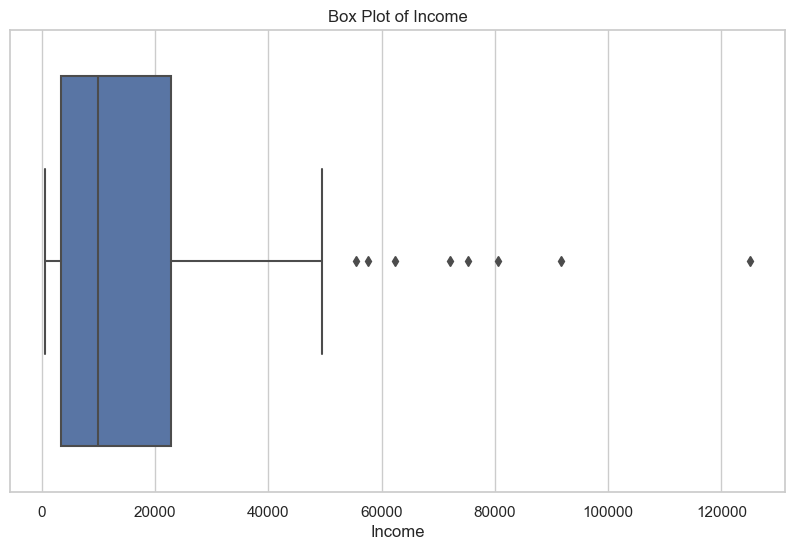

Outliers in Income:
                      Name  Income
23                 Brunei   80600
82                 Kuwait   75200
91             Luxembourg   91700
114                Norway   62300
123                 Qatar  125000
133             Singapore   72100
145           Switzerland   55500
157  United Arab Emirates   57600


In [10]:
# Визначення міжквартильного розмаху для "Income"
Q1_income = countries['Income'].quantile(0.25)
Q3_income = countries['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Визначення викидів для "Income"
outliers_income = (countries['Income'] < (Q1_income - 1.5 * IQR_income)) | (countries['Income'] > (Q3_income + 1.5 * IQR_income))

# Box plot для "Income"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Income'])
plt.title('Box Plot of Income')
plt.show()
print("Outliers in Income:\n", countries.loc[outliers_income, ['Name', 'Income']])

In [11]:
# Видалення викидів
countries = countries.loc[~outliers_income]

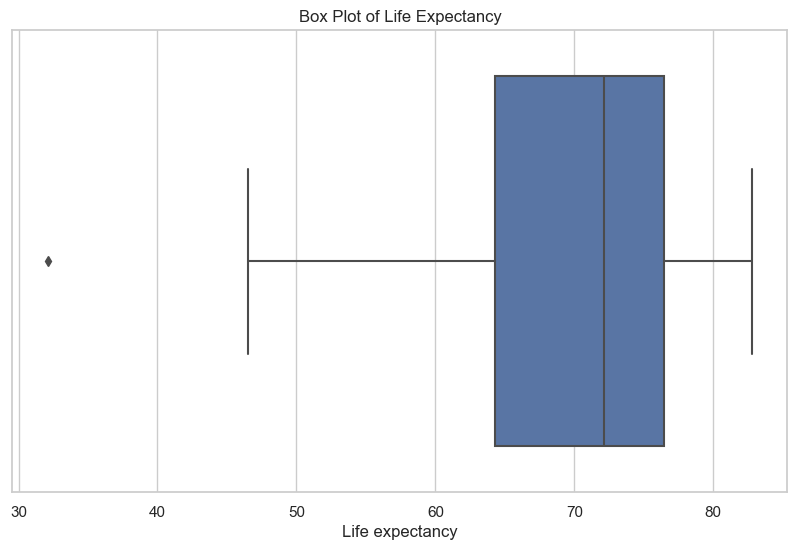

Outliers in Life Expectancy:      Name  Life expectancy
66  Haiti             32.1


In [12]:
# Визначення міжквартильного розмаху для "Life expectancy"
Q1_life = countries['Life expectancy'].quantile(0.25)
Q3_life = countries['Life expectancy'].quantile(0.75)
IQR_life = Q3_life - Q1_life

# Визначення викидів для "Life expectancy"
outliers_life = (countries['Life expectancy'] < (Q1_life - 1.5 * IQR_life)) | (countries['Life expectancy'] > (Q3_life + 1.5 * IQR_life))

# Box plot для "Life expectancy"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['Life expectancy'])
plt.title('Box Plot of Life Expectancy')
plt.show()

# Виведення викидів для "Income" та "Life expectancy"
print("Outliers in Life Expectancy:", countries.loc[outliers_life, ['Name', 'Life expectancy']])

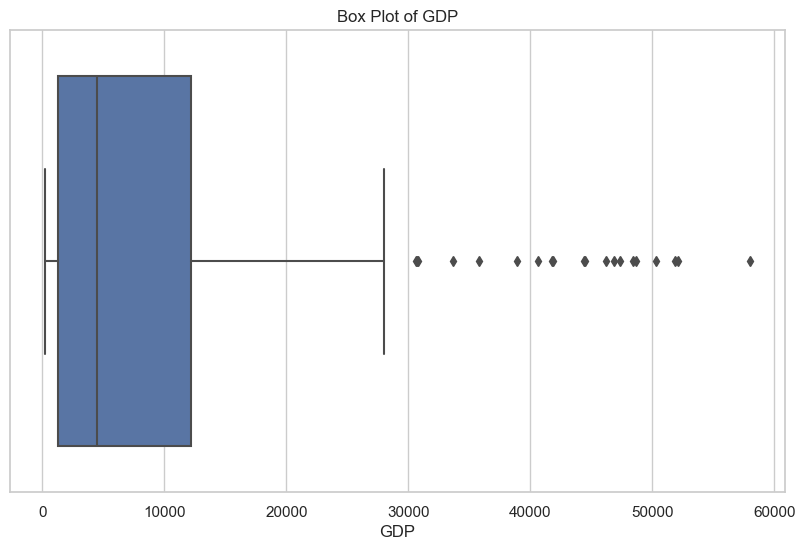

Outliers in GDP:
                Name    GDP
7         Australia  51900
8           Austria  46900
15          Belgium  44400
29           Canada  47400
42           Cyprus  30800
44          Denmark  58000
53          Finland  46200
54           France  40600
58          Germany  41800
68          Iceland  41900
73          Ireland  48700
74           Israel  30600
75            Italy  35800
77            Japan  44500
110     Netherlands  50300
111     New Zealand  33700
139           Spain  30700
144          Sweden  52100
158  United Kingdom  38900
159   United States  48400


In [13]:
# Визначення міжквартильного розмаху для "GDP"
Q1_gdp = countries['GDP'].quantile(0.25)
Q3_gdp = countries['GDP'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp

# Визначення викидів для "GDP"
outliers_gdp = (countries['GDP'] < (Q1_gdp - 1.5 * IQR_gdp)) | (countries['GDP'] > (Q3_gdp + 1.5 * IQR_gdp))

# Box plot для "GDP"
plt.figure(figsize=(10, 6))
sns.boxplot(x=countries['GDP'])
plt.title('Box Plot of GDP')
plt.show()
print("Outliers in GDP:\n", countries.loc[outliers_gdp, ['Name', 'GDP']])

In [14]:
# Видалення викидів
countries = countries.loc[~outliers_gdp]

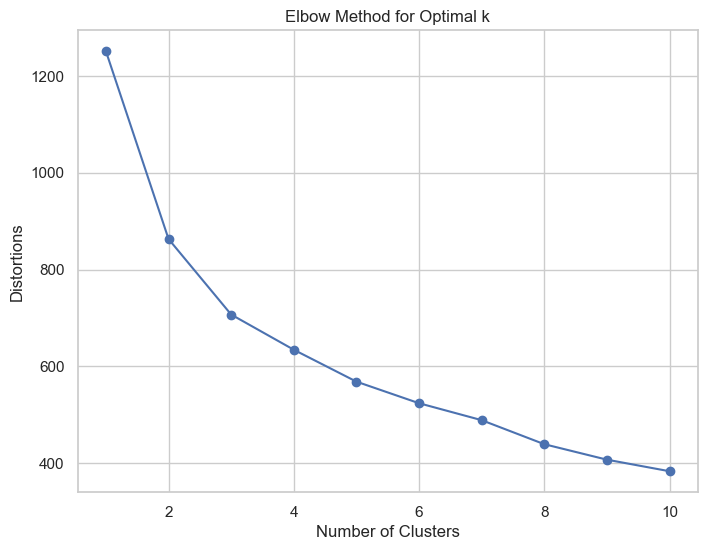

In [15]:
# Відокремлюємо числові стовпці для кластеризації
data = countries.drop('Name', axis=1)

# Стандартизація даних
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Знаходження оптимального k за допомогою методу ліктя
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

# Візуалізація методу ліктя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortions')
plt.show()

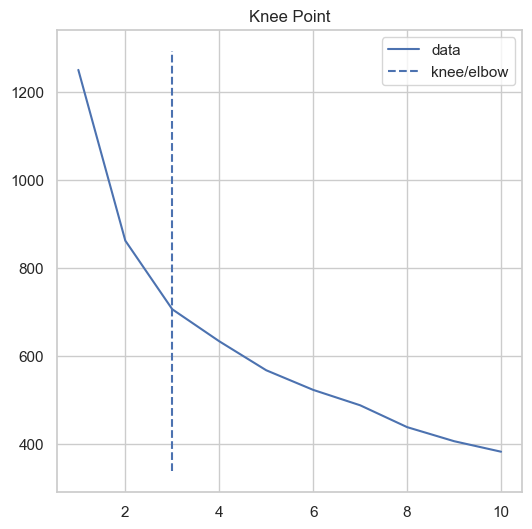

In [16]:
# Визначення оптимального k за допомогою kneed
kl = KneeLocator(range(1, 11), distortions, curve='convex', direction='decreasing')
optimal_k = kl.elbow
kl.plot_knee()
plt.show()

# Кластеризація з оптимальним k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
countries['Cluster'] = kmeans_optimal.fit_predict(data_scaled)

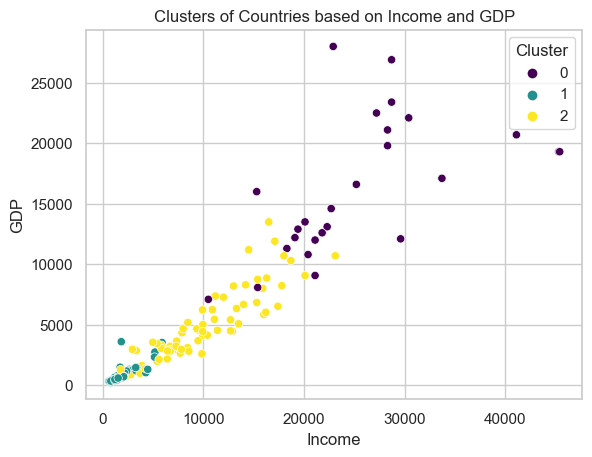

In [17]:
# Візуалізація результатів кластеризації для Income та GDP
sns.scatterplot(x='Income', y='GDP', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on Income and GDP')
plt.xlabel('Income')
plt.ylabel('GDP')
plt.show()

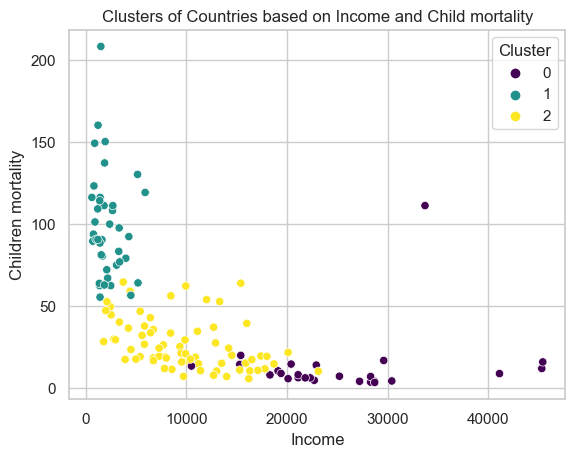

In [18]:
# Візуалізація результатів кластеризації для Income та Children mortality
sns.scatterplot(x='Income', y='Children mortality', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on Income and Child mortality')
plt.xlabel('Income')
plt.ylabel('Children mortality')
plt.show()

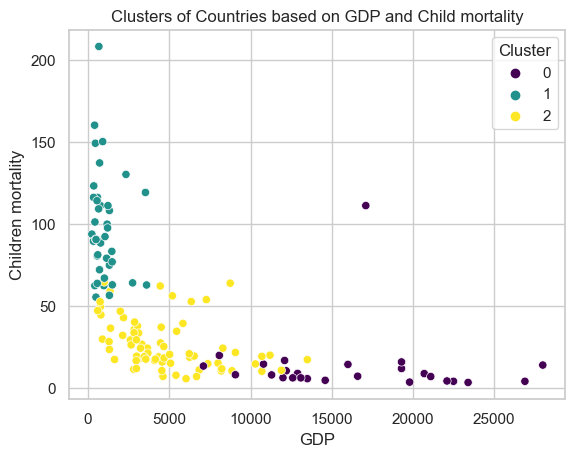

In [19]:
# Візуалізація результатів кластеризації для GDP та Children mortality
sns.scatterplot(x='GDP', y='Children mortality', hue='Cluster', data=countries, palette='viridis')
plt.title('Clusters of Countries based on GDP and Child mortality')
plt.xlabel('GDP')
plt.ylabel('Children mortality')
plt.show()

In [27]:
# Виведення таблиці з результатами кластеризації
cluster_table = countries[['Name', 'GDP', 'Income', 'Children mortality', 'Cluster']]
cluster_table.sort_values(by='Children mortality', ascending=False, inplace=True)
print(cluster_table)

                         Name    GDP  Income  Children mortality  Cluster
66                      Haiti    662    1500               208.0        1
132              Sierra Leone    399    1220               160.0        1
32                       Chad    897    1930               150.0        1
31   Central African Republic    446     888               149.0        1
97                       Mali    708    1870               137.0        1
..                        ...    ...     ...                 ...      ...
138               South Korea  22100   30400                 4.1        0
122                  Portugal  22500   27200                 3.9        0
60                     Greece  26900   28700                 3.9        0
43             Czech Republic  19800   28300                 3.4        0
135                  Slovenia  23400   28700                 3.2        0

[139 rows x 5 columns]


In [25]:
# Відфільтруємо таблицю для кластера 1
cluster_1_table = cluster_table[cluster_table['Cluster'] == 1]

# Виведемо результат
print(cluster_1_table)

                         Name   GDP  Income  Children mortality  Cluster
150                      Togo   488    1210                90.3        1
81                   Kiribati  1490    1730                62.7        1
149               Timor-Leste  3600    1850                62.6        1
88                    Liberia   327     700                89.3        1
84                        Lao  1140    3980                78.9        1
155                    Uganda   595    1540                81.0        1
66                      Haiti   662    1500               208.0        1
165                     Yemen  1310    4480                56.3        1
64              Guinea-Bissau   547    1390               114.0        1
87                    Lesotho  1170    2380                99.7        1
80                      Kenya   967    2480                62.2        1
126                    Rwanda   563    1350                63.6        1
93                 Madagascar   413    1390        